In [1]:
%matplotlib widget
import os  
import sys  
sys.path.insert(0, os.getenv('HOME')+'/pycode/MscThesis/')
from amftrack.pipeline.functions.post_processing.extract_study_zone import *
import pandas as pd
import ast
from amftrack.plotutil import plot_t_tp1
from scipy import sparse
from datetime import datetime
import pickle
import scipy.io as sio
from pymatreader import read_mat
from matplotlib import colors
import cv2
import imageio
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import frangi
from skimage import filters
from random import choice
import scipy.sparse
import os
from skimage.feature import hessian_matrix_det
from amftrack.pipeline.paths.directory import run_parallel, find_state, directory_scratch, directory_project
from amftrack.notebooks.analysis.util import * 
from scipy import stats
from scipy.ndimage.filters import uniform_filter1d
from collections import Counter
from IPython.display import clear_output
from amftrack.notebooks.analysis.data_info import *
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
plt.rcParams.update({
    "font.family": "verdana",
'font.weight' : 'normal',
'font.size': 20})
from amftrack.plotutil import plot_node_skel
from amftrack.notebooks.validation.util import *
from amftrack.pipeline.paths.directory import *
from amftrack.util.sys import *
from amftrack.notebooks.post_processing.util import *
import pickle
from amftrack.pipeline.functions.image_processing.experiment_class_surf import Experiment, save_graphs, load_graphs
from amftrack.plotutil import plot_t_tp1, plot_node_skel
import imageio



/home/cbisot/pycode/MscThesis/amftrack/transfer/functions/transfer.py:1: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
directory = directory_project
directory = "/projects/0/einf914/agg/"

# update_analysis_info(directory)
analysis_info = get_analysis_info(directory)
select = analysis_info

In [5]:
plate = 737
rows = [row for (index, row) in select.iterrows()]
for index, row in enumerate(rows):
    path = f'{directory}{row["folder_analysis"]}'
    try:
        a = np.load(f"{path}/center.npy")
    except:
        print(index, row["Plate"])
    if row["Plate"] == plate:
        path_exp = f'{directory}{row["path_exp"]}'
        exp = pickle.load(open(path_exp, "rb"))
        exp.dates.sort()
        break

In [ ]:
# exp.labeled = True
load_graphs(exp, indexes=range(0, 0))

In [9]:
end = 2895
hyph = [hyph for hyph in exp.hyphaes if hyph.end.label == end][0]
# end = 1
# hyph2= [hyph for hyph in exp.hyphaes if hyph.end.label == end][0]

In [19]:
np.linalg.norm(hyph.end.pos(0) - hyph2.end.pos(0)) * 1.725

9215.06979985773

In [ ]:
node = choice(exp.nodes)

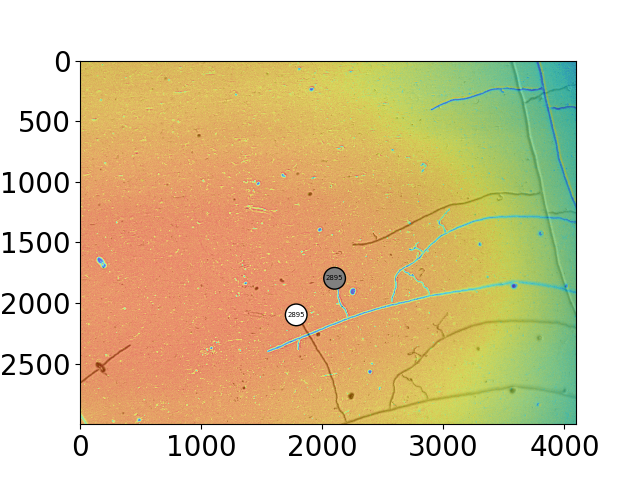

In [11]:
plt.close("all")
init = 8
hyph.end.show_source_image(init, init + 1)

In [12]:
def make_video_node(node, t0, t1, anchor=None, ranges=1000):
    for t in range(t0, t1):
        save = f"Figure/im**{t}"
        plot_node_skel(
            node, t, ranges=ranges, save=save, anchor=anchor, anchor_time_display=t0
        )
    img_array = []
    for t in range(t0, t1):
        img = cv2.imread(f"Figure/im**{t}.png")
        height, width, layers = img.shape
        size = (width, height)
        ratio = 5
        for i in range(int(ratio * get_time(exp, t, t + 1))):
            img_array.append(img)
    imageio.mimsave(f"Figure/{node.experiment.plate}_{node.label}.mp4", img_array)

In [13]:
def get_time(exp, t, tp1):  # redefined here to avoid loop in import
    seconds = (exp.dates[tp1] - exp.dates[t]).total_seconds()
    return seconds / 3600


def plot_node_skel(node, t0, ranges=1000, save="", anchor=None, anchor_time_display=0):
    t = t0
    exp = node.experiment
    anchor_time = t0 if (anchor is None) else anchor
    center = node.pos(anchor_time)[1], node.pos(anchor_time)[0]
    window = (
        center[0] - ranges,
        center[0] + ranges,
        center[1] - ranges,
        center[1] + ranges,
    )
    skelet, rot, trans = get_skeleton(
        node.experiment, window, t, node.experiment.directory
    )
    #     im_stitched = get_im_stitched(exp,window,t,directory)
    tips = [node.label]
    junction = []
    # tips = [node.label for node in exp.nodes if t in node.ts() and node.degree(t) ==1 and node.pos(t)[1]>=window[0] and node.pos(t)[1]<=window[1] and node.pos(t)[0]>=window[2] and node.pos(t)[0]<=window[3]]
    # junction =  [node.label for node in exp.nodes if t in node.ts() and node.degree(t) >=2 and node.pos(t)[1]>=window[0] and node.pos(t)[1]<=window[1] and node.pos(t)[0]>=window[2] and node.pos(t)[0]<=window[3]]
    _ = plot_t_tp1(
        junction,
        tips,
        exp.positions[t],
        exp.positions[t],
        skelet,
        skelet,
        shift=(window[2], window[0]),
        save=save,
        time=f"t={int(get_time(exp,anchor_time_display,t))}h",
    )

In [14]:
make_video_node(hyph.end, 8, 19, ranges=3000)

findfont: Font family ['verdana'] not found. Falling back to DejaVu Sans.
findfont: Font family ['verdana'] not found. Falling back to DejaVu Sans.
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1400, 1200) to (1408, 1200) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
[swscaler @ 0x73f9980] Warning: data is not aligned! This can lead to a speed loss
